## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [17]:
# Question 1.1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Question 1.1

Completed in code chunk above.

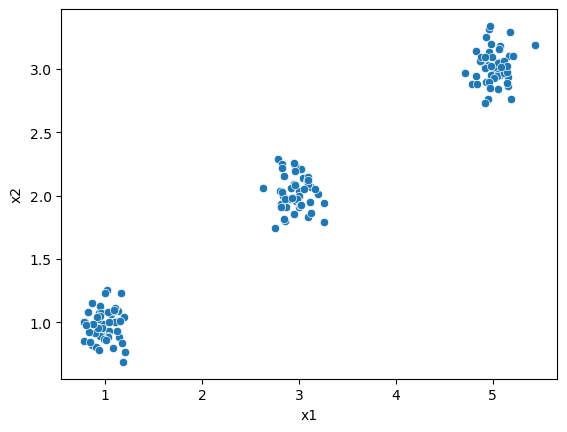

In [18]:
# Question 1.2
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure() 
plot1 = sns.scatterplot(data=df0_125, x="x1", y="x2")
plt.show()

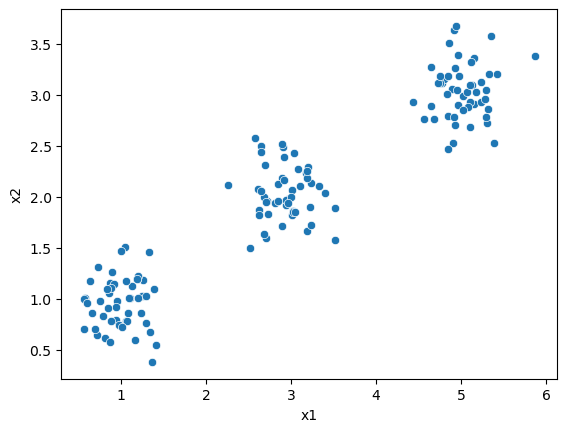

In [19]:
plt.figure()
plot2 = sns.scatterplot(data=df0_25, x="x1", y="x2")
plt.show()

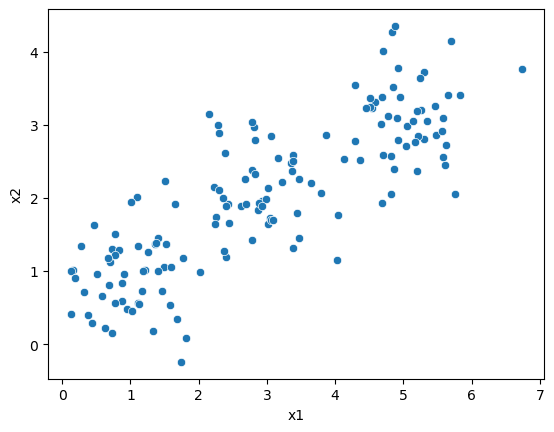

In [20]:
plt.figure()
plot3 = sns.scatterplot(data=df0_5, x="x1", y="x2")
plt.show()

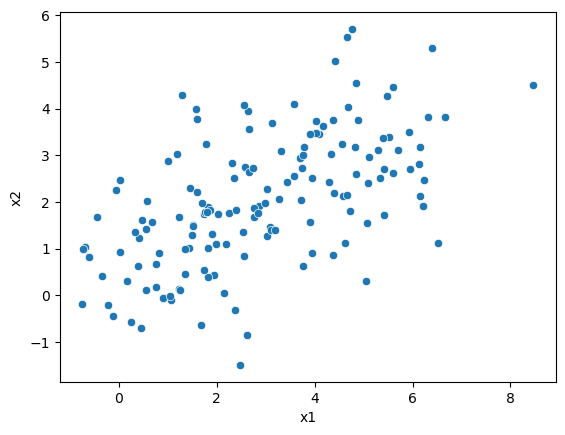

In [21]:
plt.figure()
plot4 = sns.scatterplot(data=df1_0, x="x1", y="x2")
plt.show()

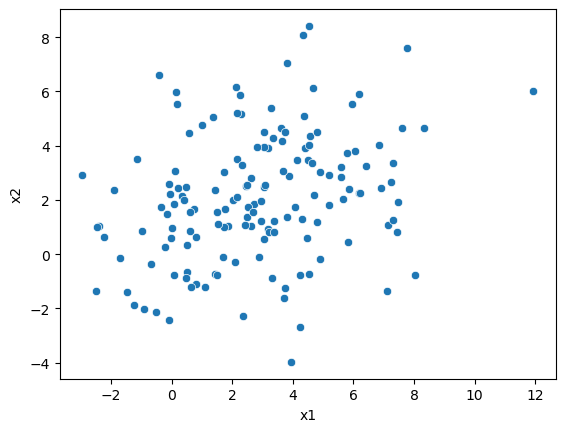

In [22]:
plt.figure()
plot5 = sns.scatterplot(data=df2_0, x="x1", y="x2")
plt.show()

Question 1.2

As the noise increases in the data, the points in the clusters on the plot become more spread out from each other.

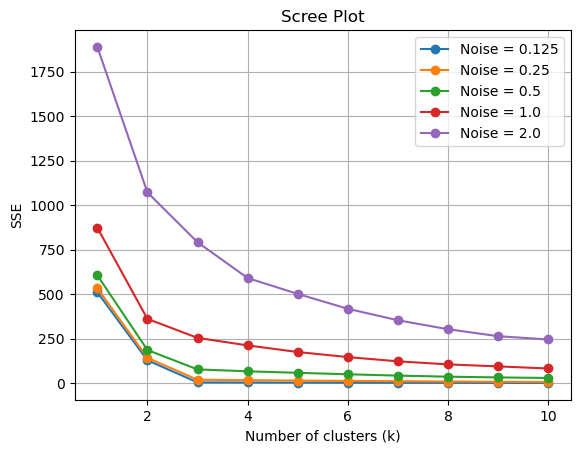

In [ ]:
# Question 1.3
from sklearn.cluster import KMeans

def scree_plot(df, max_k=10):
    X = df[["x1", "x2"]].values
    SSE = []
    for k in range(1, max_k+1): 
        model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) 
        model = model.fit(X) 
        SSE.append(model.inertia_) 
    return SSE

# Plotting
datasets = {
    'Noise = 0.125': df0_125,
    'Noise = 0.25':  df0_25,
    'Noise = 0.5':   df0_5,
    'Noise = 1.0':   df1_0,
    'Noise = 2.0':   df2_0
}

k_bar = 10
results = {}
for name, df in datasets.items():
    results[name] = scree_plot(df)

plt.figure()
k_values = np.arange(1, k_bar+1)
for name, SSE in results.items():
    plt.plot(k_values, SSE, marker='o', label=name)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()


Question 1.3

As the level of noise increases, the SSE tends to be higher on the plot. We can see the presence of an elbow at k=3 for the datasets with lower noise (0.125, 0.25, and 0.5). For the Noise=1.0 dataset, we can see a potential presence of an elbow at k=3, and for the Noise=2.0 dataset it is hard to determine where the elbow can be definitively seen.

Question 1.4

Using the elbow method is useful because it can show what the optimal k value is. This is shown when we can clearly see a plateau on the scree plot above. The elbow method is more effective when there is less noise in the data. This is shown in this numerical simulation because we can see a clear elbow in the datasets with lower noise, and the elbow become harder to distinguish when the noise increases

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [7]:
# Question 2.1
q2data = pd.read_csv("./data/2022 election cycle fundraising.csv")
q2data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [8]:
# clean the data
q2data["Raised"] = q2data["Raised"].str.replace("$", '', regex=False).str.replace(",", '', regex=False).str.strip().astype(int)
q2data["Spent"] = q2data["Spent"].str.replace("$", '', regex=False).str.replace(",", '', regex=False).str.strip().astype(int)
q2data["Cash on Hand"] = q2data["Cash on Hand"].str.replace("$", '', regex=False).str.replace(",", '', regex=False).str.strip().astype(int)
q2data["Debts"] = q2data["Debts"].str.replace("$", '', regex=False).str.replace(",", '', regex=False).str.strip().astype(int)
q2data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


Question 2.1

In order to clean the varibles with commas and $'s, we need to remove these values from the columns using the replace and strip methods. This will standardize these columns so they can be used as numerical values.

In [38]:
# Question 2.2
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

q2data["Raised_Normalized"] = maxmin(q2data["Raised"])
q2data["Spent_Normalized"] = maxmin(q2data["Spent"])

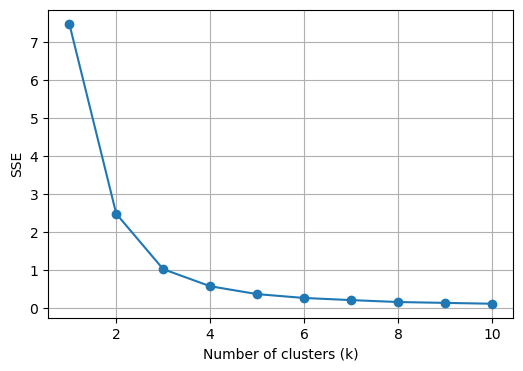

In [ ]:
X = q2data[["Raised_Normalized", "Spent_Normalized"]].values

k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)
    
# Scree plot
plt.figure()
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

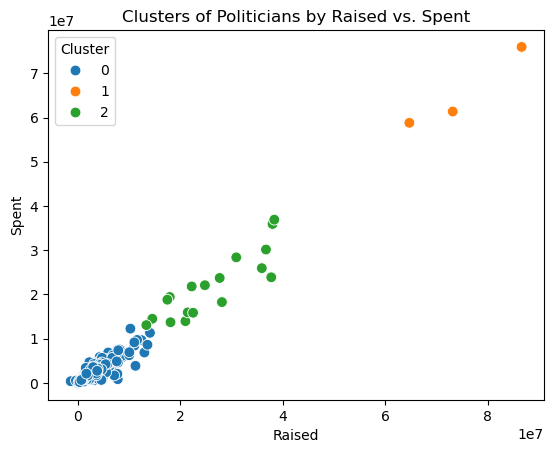

In [ ]:
# Scatter plot
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
q2data["Cluster"] = kmeans.fit_predict(q2data[["Raised_Normalized", "Spent_Normalized"]])

plt.figure()
sns.scatterplot(data=q2data, x="Raised", y="Spent", hue="Cluster", palette="tab10", s=60)
plt.title("Clusters of Politicians by Raised vs. Spent")
plt.show()

In [47]:
cluster_counts = q2data["Cluster"].value_counts().sort_values(ascending=True)
print(cluster_counts)

smallest_clusters = cluster_counts.index[:2]
candidates = (q2data[q2data["Cluster"].isin(smallest_clusters)][["Member", "Party", "State", "Chamber", "Raised", "Spent", "Cluster"]].sort_values(['Cluster','Raised'], ascending=[True, False]))
print(candidates)

1      3
2     18
0    516
Name: Cluster, dtype: int64
                     Member       Party           State Chamber    Raised  \
417         Raphael Warnock  Democratic         Georgia  Senate  86581469   
340              Mark Kelly  Democratic         Arizona  Senate  73140886   
523             Val Demings  Democratic         Florida   House  64682883   
499                Tim Ryan  Democratic            Ohio   House  38334636   
87   Catherine Cortez Masto  Democratic          Nevada  Senate  37993811   
500               Tim Scott  Republican  South Carolina  Senate  37743256   
328             Marco Rubio  Republican         Florida  Senate  36709285   
89            Chuck Schumer  Democratic        New York  Senate  35899966   
326           Maggie Hassan  Democratic   New Hampshire  Senate  30914830   
261            John Kennedy  Republican       Louisiana  Senate  28119082   
442             Ron Johnson  Republican       Wisconsin  Senate  27680901   
298          Kevin Mc

Question 2.2

Based on the scree plot, the optimal k is 3 because this is where the elbow is seen. When looking at the scatter plot with the optimal k, we can see that the majority of the candidates are in the cluster of low raised and low spent (cluster 0). Only a few candidates fall on the opposite end with high raised and high spent (cluster 1). The politician that comprise the smallest cluster (1) are Rapheal Warnock, Mark Kelly, and Val Demings. The politicians that comprise the middle cluster (cluster 2) are Tim Ryan, Catherine Cortez Masto, Tim Scott, Marco Rubio, Chuck Schumer, Maggie Hassan, John Kennedy, Ron Johnson, Kevin McCarthy, Rand Paul, Nancy Pelosi, Katie Porter, Adam Schiff, Michael Bennet, Steve Scalise, Ted Cruz, Dan Crenshaw, and Patty Murray.

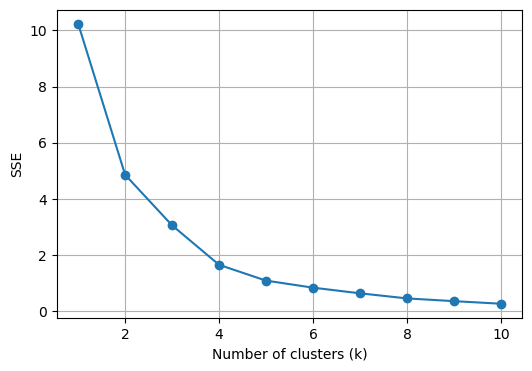

In [ ]:
# Question 2.3
q2data["CashOnHand_Normalized"] = maxmin(q2data["Cash on Hand"])
q2data["Debts_Normalized"]  = maxmin(q2data["Debts"])

X = q2data[['CashOnHand_Normalized', 'Debts_Normalized']].values

k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)
    
# Scree plot
plt.figure(figsize=(6,4))
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

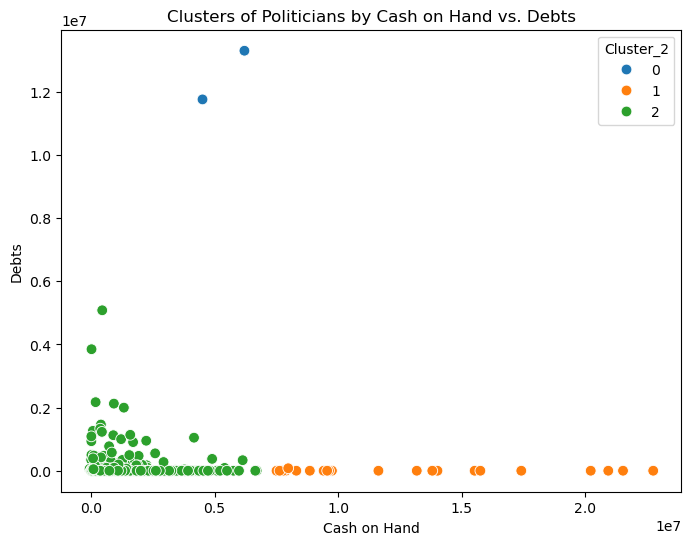

In [52]:
# Scatter plot
optimal_k = 3
kmeans_2 = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
q2data["Cluster_2"] = kmeans.fit_predict(q2data[["CashOnHand_Normalized", "Debts_Normalized"]])

plt.figure(figsize=(8,6))
sns.scatterplot(data=q2data, x="Cash on Hand", y="Debts", hue="Cluster_2", palette="tab10", s=60)
plt.title("Clusters of Politicians by Cash on Hand vs. Debts")
plt.show()

In [ ]:
cluster_counts = q2data["Cluster_2"].value_counts().sort_values(ascending=True)
print(cluster_counts)

smallest_clusters = cluster_counts.index[:2]
candidates = (q2data[q2data["Cluster_2"].isin(smallest_clusters)][["Member", "Party", "State", "Chamber", "Cash on Hand", "Debts", "Cluster_2"]].sort_values(["Cluster_2", "Cash on Hand"], ascending=[True, False]))
print(candidates)

0      2
1     24
2    511
Name: Cluster_2, dtype: int64
                  Member        Party           State Chamber  Cash on Hand  \
133          David Trone   Democratic        Maryland   House       6206371   
442          Ron Johnson   Republican       Wisconsin  Senate       4508581   
417      Raphael Warnock   Democratic         Georgia  Senate      22762985   
500            Tim Scott   Republican  South Carolina  Senate      21539824   
2            Adam Schiff   Democratic      California   House      20942888   
89         Chuck Schumer   Democratic        New York  Senate      20231213   
267           John Thune   Republican    South Dakota  Senate      17419927   
290         Katie Porter   Democratic      California   House      15762568   
261         John Kennedy   Republican       Louisiana  Senate      15530074   
274      Josh Gottheimer   Democratic      New Jersey   House      14024163   
310       Lindsey Graham   Republican  South Carolina  Senate      1381551

Question 2.3

When comparing this clustering to question 2.2, we can see that it is harder to determine where the elbow is on this scree plot. This is because this pairing has more noise than Raised/Spent. More noise in the data will make it harder to find a distinct elbow. Based on the patterns in the scatter plot, we can see that very few candidates end their races with high debts. Most of them end with little to no debt.

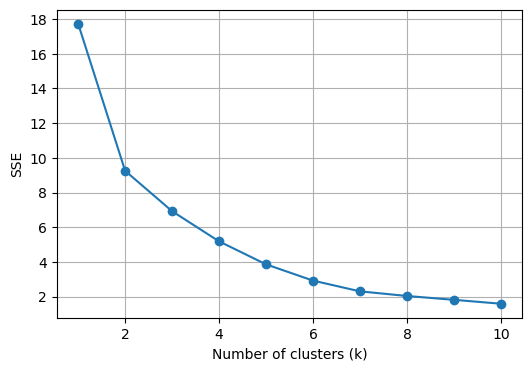

In [62]:
# Question 2.4
numeric_variables = ["Raised", "Spent", "Cash on Hand", "Debts"]

# Maxmin
X = q2data[numeric_variables].apply(maxmin)

k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


Question 2.4

Based on the scree plot, the optimal k appears to be larger than in the previous two questions. Additionally, it is harder to tell where the elbow is because there is more noise in this clustering than in the clustering with Raised and Spent. Raised and Spent have a strong relationship, and Cash on Hand and Debts do not. When all of these variables are considered for clustering together, there will be more noise (making it harder to determine where the elbow is).

Question 2.5

Using the k-means clustering algorithm helped in finding certain patterns in the data in this problem. For example, clustering on Raised and Spent showed that very few candidates raise and spend the highest amount of money in a race. Most candidates do not spend very much and they do not raise very much. Also, clustering on Cash on Hand and Debts showed that many candidates end their races with little to no debt.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?